# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [287]:
import numpy as np
from scipy import optimize
from scipy.optimize import LinearConstraint
import sympy as sm
import ipywidgets as widgets # Interactive plots
import matplotlib.pyplot as plt


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules

import modelproject as mod

%load_ext autoreload
%autoreload 2
import CES_function as ces

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Layout
2. Analytical solution - Use standard solution - Sunday
3. Numerical - Find output - Sunday
4. Two extension - 1. CES utility functions (Tuesday). 2. More consumers (Tuesday). (3. Combination?) (4. More goods)
5. Conclusion (Thursday)

# 1. Model description of baseline model

**Time:** One period.

**Demographics:** Initially one consumer and one firm. The firm is owned by the consumer and therefore the income also depends on the profit. We do not assume initial goods endowments. 

**Household:** For our baseline model we assume that the consumer has Cobb-Douglas preferences, where the two goods are the product (c) and leisure (l)
$$
\begin{aligned}
& max u =c^{\alpha}*l^{1-\alpha}, 0<\alpha<1\\
 & \text{s.t.}\\
 & I=\Pi + w*L=p*c +w*l \\

\end{aligned}
$$

p is the price of the good, w is the wage, L is the initial labor endowment, l is leisure and $\Pi$ is the profit. We have assumed monotonicity. Further, we have the firm problem: 
$$
\begin{aligned}
&\Pi =p*y-w*h

\end{aligned}
$$

The production function will be defined as follow, where the interpretation of A can be TFP: 

$$
\begin{aligned}
&y =A*h^{\beta}, \beta <1 \\
&max \Pi =p*A*h^{\beta}-w*h

\end{aligned}
$$

We assume the initial labor endowment is 24 hours, i.e. a day. We can therefore define the following relationsship in equilibrium: 
$$
\begin{aligned}
&L=24=l+h

\end{aligned}
$$




**Equilibrium:** The procedure is defined where the labor market (l+h=24) and good market (y=c) clear. Further, the firm has maximized its profit and the consumer has maximized its utility. 



## 2. Analytical solution

The baseline model can be solved analytically. The starting point is to derive the firm's demand for labor. This is done by taking the FOC of the profit w.r.t. working hours. This given the following result:  

$$
\begin{aligned}
& h^*=(\frac{\beta*p*A}{w})^{\frac{1}{1-\beta}}
\end{aligned}
$$

This gives the following output and profit: 

$$
\begin{aligned}
& y^*=A*(\frac{\beta*p*A}{w})^{\frac{\beta}{1-\beta}}\\
& \Pi^*=p*A*(\frac{\beta*p*A}{w})^{\frac{\beta}{1-\beta}}-w(\frac{\beta*p*A}{w})^{\frac{1}{1-\beta}}
\end{aligned}
$$

Now, we will solve for the consumer's problem. It should be noted that the working hours and profit is exogenous for the consumer as the firm has already decided this based on the prices. We have a Cobb-Douglas function and can therefore use the standard solution: 

$$
\begin{aligned}
& c^*=\alpha*\frac {I}{p}\\
& l^*=(1-\alpha)*\frac{I}{w}
\end{aligned}
$$

Where the income is: 

$$
\begin{aligned}
& I= \Pi+24 = p*A*(\frac{\beta*p*A}{w})^{\frac{\beta}{1-\beta}}-w(\frac{\beta*p*A}{w})^{\frac{1}{1-\beta}} + 24
\end{aligned}
$$



Now we want to find the prices in equilibrium. Lets sets the wage as numeraire, i.e. w=1. We can then solve for the labor market: 

$$
\begin{aligned}
& l^*=24-h^*\\
& \leftrightarrow (1-\alpha)*(p*A*(\beta*p*A)^{\frac{\beta}{1-\beta}}-(\beta*p*A)^{\frac{1}{1-\beta}}+24)=24-(\beta*p*A)^{\frac{1}{1-\beta}}
\end{aligned}
$$

Solving this for p gives: 

$$
\begin{aligned}
& p^*=\frac {24^{1-\beta}}{A}*\frac {1}{(\beta^\frac {\beta}{1-\beta}*(1-\alpha)+\alpha*\beta^\frac {1}{1-\beta})^{1-\beta}}
\end{aligned}
$$

We see that higher productivity (A) decreases the price, which makes intuively sense as this will increase the supply. Further, higher demand ($\alpha$) will increase the price, which again makes intuitively sense. With this price we have the general solution, which can be plotted below. 

In [230]:
mod.consumption(0.5,0.5,20, L=75)

(0.5, 25.0, 100.0, 25.0, 100.0, 100.0, 50.0)

Now we have the general solution. This can be illustrated by using specific values for the parameters in the model. 

In [191]:
# Write out which arguments to interactive_figure you want to be changing or staying fixed 
widgets.interact(mod.interactive_figure,
    beta=widgets.FloatSlider(description=r"beta", min=0., max=0.99, step=0.10, value=0.5), 
    A=widgets.FloatSlider(description=r"A", min=1, max=10, step=1, value=5),
);

interactive(children=(FloatSlider(value=0.5, description='beta', max=0.99), FloatSlider(value=5.0, description…

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [180]:
test=mod.numerical_solution()

#Alpha plot

N=50

alpha_vec_num=np.empty(N)
p_vec_num_alpha=np.empty(N)
c_clearing_alpha=np.empty(N)
l_clearing_alpha=np.empty(N)

for i, alpha in enumerate(np.linspace(start=0.01, stop = 0.99, num=N)):
    # Call find_relative_price with current alpha value
    alpha_baseline=test.par.alpha
    test.par.alpha=alpha
    alpha_vec_num[i]=alpha
    p_vec_num_alpha[i],c_clearing_alpha[i], l_clearing_alpha[i] = test.find_relative_price(tol=1e-4, p_lower=0, p_upper=1000, adj=0.5)
    test.par.alpha=alpha_baseline






c:\Users\Ander\OneDrive - University of Copenhagen\Kandidat\1. semester\Introduction to Programming and Numerical Analysis\Python\projects-2023-andershuus_christianfogel\modelproject\modelproject.py:224: RuntimeWarning: divide by zero encountered in double_scalars
  sol.c_star = par.alpha*utility_inc/p


 Step 28.00: p = 0.06 ->  -0.00008752. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 30.00: p = 0.11 ->   0.00002677. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 29.00: p = 0.14 ->  -0.00007349. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 29.00: p = 0.16 ->   0.00004665. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 28.00: p = 0.19 ->   0.00009061. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 30.00: p = 0.21 ->   0.00002379. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 28.00: p = 0.23 ->   0.00000318. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 30.00: p = 0.25 ->   0.00007239. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 27.00: p = 0.26 ->  -0.00000335. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 30.00: p = 0.28 ->   0.00003043. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 29.00: p = 0.30 ->  -0.00002723. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 29.00: p = 0.31 ->   0.00004465. Good clearing = 0.

In [181]:
test=mod.numerical_solution()

#Beta plot

N=10

beta_vec_num=np.empty(N)
p_vec_num_beta=np.empty(N)
c_clearing_beta=np.empty(N)
l_clearing_beta=np.empty(N)

for i, beta in enumerate(np.linspace(start=0.01, stop = 0.8, num=N)):
    # Call find_relative_price with current beta value
    beta_baseline=test.par.beta
    test.par.beta=beta
    beta_vec_num[i]=beta
    p_vec_num_beta[i],c_clearing_beta[i], l_clearing_beta[i] = test.find_relative_price(tol=1e-4, p_lower=0, p_upper=1000, adj=0.5, iterations=500)
    test.par.beta=beta_baseline

 Step 23.00: p = 3.72 ->  -0.00005188. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 22.00: p = 2.84 ->  -0.00007574. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 24.00: p = 2.00 ->   0.00004970. Good clearing = 0.00. Labor clearing = 0.00. 
 Step 26.00: p = 1.38 ->  -0.00005661. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 27.00: p = 0.94 ->  -0.00009904. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 26.00: p = 0.63 ->  -0.00001485. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 27.00: p = 0.42 ->  -0.00006197. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 32.00: p = 0.28 ->  -0.00005416. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 31.00: p = 0.19 ->  -0.00001704. Good clearing = -0.00. Labor clearing = -0.00. 
 Step 28.00: p = 0.13 ->  -0.00001665. Good clearing = -0.00. Labor clearing = -0.00. 


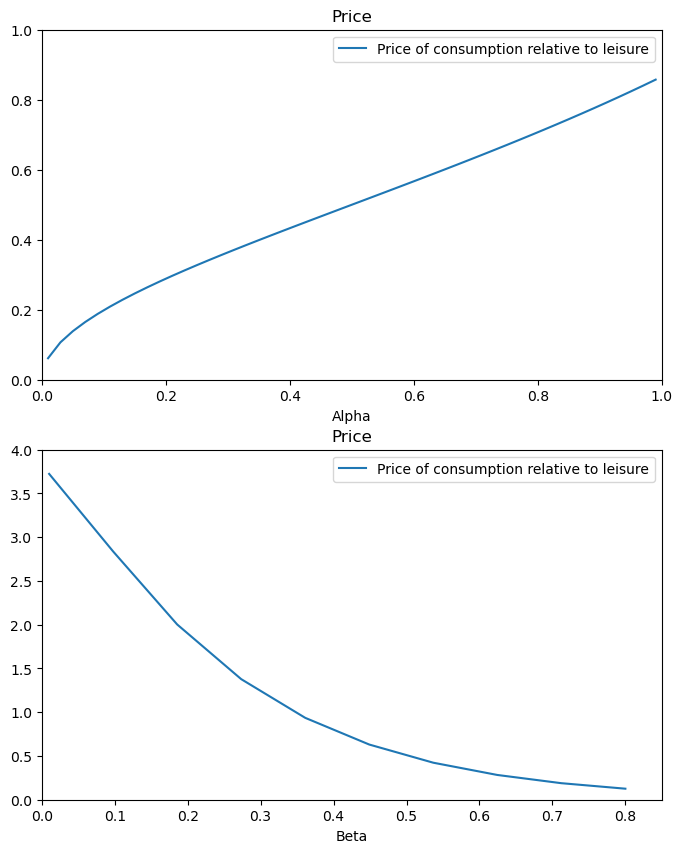

In [182]:

fig = plt.figure(figsize=(8,10))
dx = fig.add_subplot(2,1,1)
dx.plot(alpha_vec_num, p_vec_num_alpha, label='Price of consumption relative to leisure')
dx.set_xlim([0.0,1]) # 
dx.set_ylim([0,1]) #
dx.set_title("Price")
dx.set_xlabel("Alpha") 
dx.legend(loc= 'upper right')


dx = fig.add_subplot(2,1,2)
dx.plot(beta_vec_num, p_vec_num_beta, label='Price of consumption relative to leisure')
dx.set_xlim([0.0,0.85]) # 
dx.set_ylim([0,4]) #
dx.set_title("Price")
dx.set_xlabel("Beta") 
dx.legend(loc= 'upper right')

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

Labor Union

CES function

In [289]:
#CES function
#ces.maximize_utility(5)
#ces.find_relative_price(tol=1e-4, p_lower=0, p_upper=1000, adj=0.5)
#ces.utility_maximization(0.5)

In [284]:
#Alpha plot

N=5

sigma_vec_num=np.empty(N)
p_vec_num_sigma=np.empty(N)
c_clearing_sigma=np.empty(N)
l_clearing_sigma=np.empty(N)

for i, sigma in enumerate(np.linspace(start=0.10, stop = 0.9, num=N)):
    # Call find_relative_price with current alpha value
    print(sigma)
    sigma_baseline=ces.par.sigma
    ces.par.sigma=sigma
    sigma_vec_num[i]=sigma
    p_vec_num_sigma[i],c_clearing_sigma[i], l_clearing_sigma[i] = ces.find_relative_price(tol=1e-4, p_lower=0, p_upper=1000, adj=0.5)
    ces.par.sigma=sigma_baseline

0.1


AttributeError: module 'CES_function' has no attribute 'par'

In [290]:
#Alpha plot

N=10

sigma_values=[0.10,0.5,5,50]

ces=ces.numerical_solution_ces()

beta_vec_num = np.empty((4,))
sigma_vec_num = np.empty((4,))
p_vec_num_beta_ces=np.empty((4,4))
c_clearing_beta_ces=np.empty((4,4))
l_clearing_beta_ces=np.empty((4,4))
for j, sigma in enumerate(sigma_values):
    sigma_baseline=ces.par.sigma
    ces.par.sigma=sigma
    sigma_vec_num[j] = sigma
    for i, beta in enumerate(np.linspace(start=0.2, stop = 0.7, num=3)):
        # Call find_relative_price with current alpha value
        beta_baseline=ces.par.beta
        ces.par.beta=beta
        beta_vec_num[i]=beta
        p_vec_num_beta_ces[i,j], c_clearing_beta_ces[i,j], l_clearing_beta_ces[i,j] = ces.find_relative_price(tol=1e-4, p_lower=0, p_upper=1000, adj=0.5)
        ces.par.beta=beta_baseline
    ces.par.sigma=sigma_baseline

AttributeError: 'types.SimpleNamespace' object has no attribute 'Sigma'

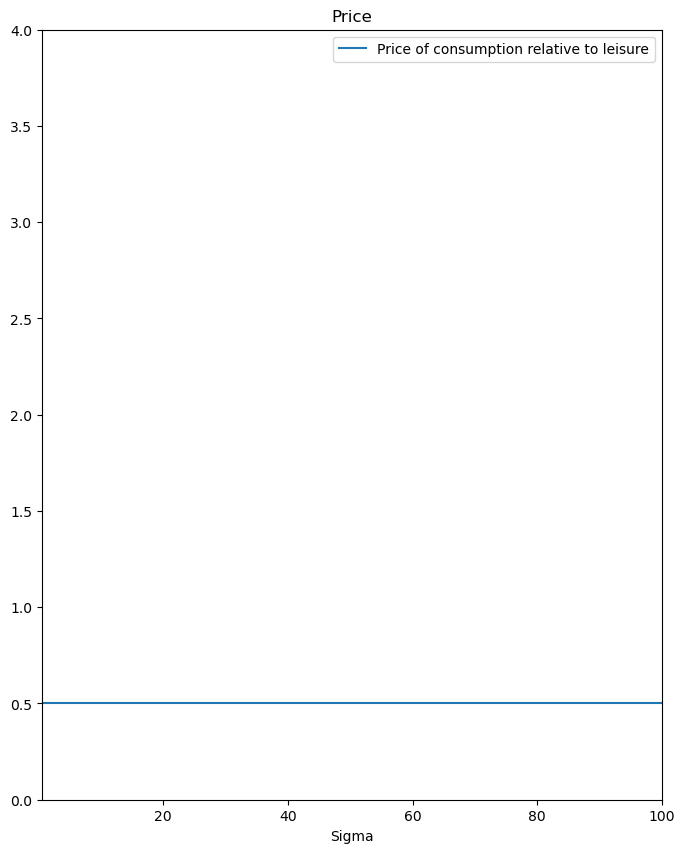

In [267]:
fig = plt.figure(figsize=(8,10))
ex = fig.add_subplot(1,1,1)
ex.plot(sigma_vec_num, p_vec_num_sigma, label='Price of consumption relative to leisure')
ex.set_xlim([0.5,100]) # 
ex.set_ylim([0,4]) #
ex.set_title("Price")
ex.set_xlabel("Sigma") 
ex.legend(loc= 'upper right')

# Conclusion

Add concise conclusion. 